<a href="https://colab.research.google.com/github/Sayan-99/Heroku-Demo/blob/master/BERT_Sentiment_Analysis_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install ktrain

     |████████████████████████████████| 25.3MB 1.4MB/s 
     |████████████████████████████████| 983kB 39.6MB/s 
     |████████████████████████████████| 245kB 44.6MB/s 
     |████████████████████████████████| 890kB 37.9MB/s 
     |████████████████████████████████| 471kB 42.3MB/s 
     |████████████████████████████████| 3.0MB 26.5MB/s 
     |████████████████████████████████| 890kB 36.8MB/s 
     |████████████████████████████████| 1.1MB 34.0MB/s 
  Created wheel for ktrain: filename=ktrain-0.21.3-cp36-none-any.whl size=25270203 sha256=c76994cecc0e80433ad2b2d4edfd8923cc835bfcd4d000616e2656014eca62d6
  Stored in directory: /root/.cache/pip/wheels/d6/ef/6d/9428365b27ac1e84a77214c5718e7f8b2180007af593791247
  Created wheel for keras-bert: filename=keras_bert-0.86.0-cp36-none-any.whl size=34145 sha256=9829ab0f096f23d3b18002035e9d455b9e40a2ca70a5493fbfb314ab55ffb412
  Stored in directory: /root/.cache/pip/wheels/66/f0/b1/748128b58562fc9e31b907bb5e2ab6a35eb37695e83911236b
  Created wheel for lan

# Importing all the libraries 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ktrain
from google.colab import files
from ktrain import text 
import tensorflow as tf
import io

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Importing the dataset 

In [ ]:
upload = files.upload()

Saving train.txt to train.txt


In [ ]:
dataset = pd.read_csv(io.StringIO(upload['train.txt'].decode('utf-8')), delimiter=';')

In [ ]:
dataset.head(20)

,text,target
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
5,ive been feeling a little burdened lately wasn...,sadness
6,ive been taking or milligrams or times recomme...,surprise
7,i feel as confused about life as a teenager or...,fear
8,i have been with petronas for years i feel tha...,joy
9,i feel romantic too,love


# Data Preprocessing

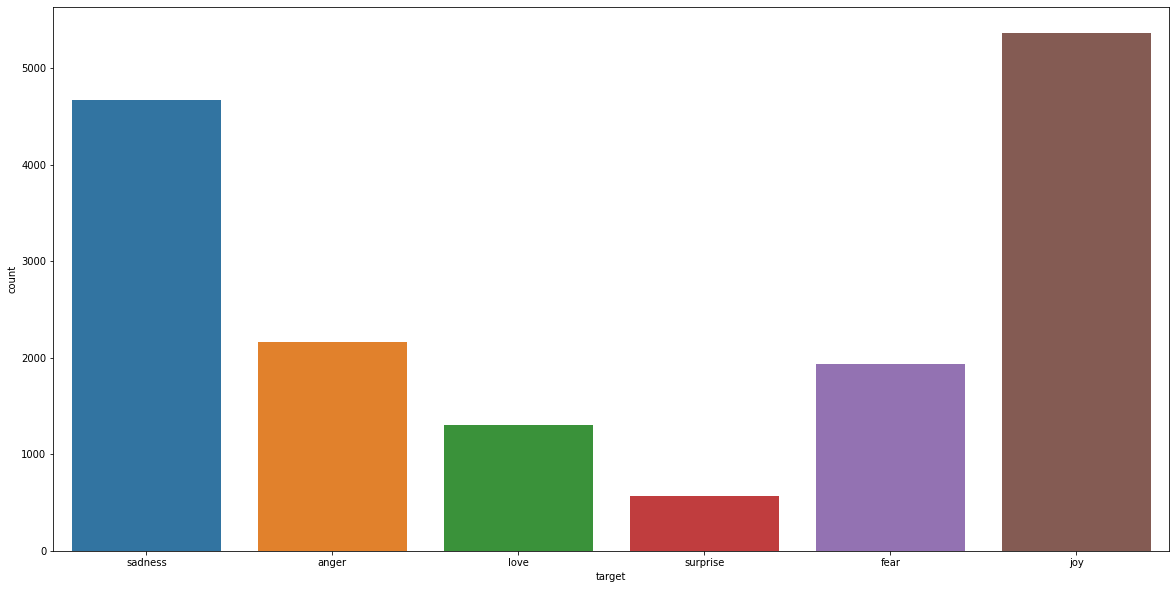

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x=dataset['target'])

In [ ]:
X = dataset['text']
y = dataset['target']

In [ ]:
X.shape

(16000,)

In [ ]:
y.shape

(16000,)

In [ ]:
y.unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
X_train.shape

(12800,)

In [ ]:
X_test.shape

(3200,)

In [ ]:
y_train.unique()

array(['sadness', 'anger', 'fear', 'love', 'joy', 'surprise'],
      dtype=object)

In [ ]:
X_train = list(X_train)
X_test = list(X_test)
y_train = list(y_train)
y_test = list(y_test)

In [ ]:
len(X_test)

3200

In [ ]:
len(X_train)

12800

In [ ]:
X_test[4]

'i can t even stand this feeling because i realize that everything is for nothing i will never be with you and i will never see you in my life it hurts but i keep supporting you'

# Setting the Classes, So it's having 6 classes

In [ ]:
label = ['anger', 'fear', 'joy', 'love', 'sadness', 'surprise']

# Bert Model 

In [ ]:
(X_train, y_train), (X_test,y_test), preproc = text.texts_from_array(x_train=X_train, y_train=y_train,
                                                                     x_test=X_test, y_test=y_test,
                                                                     class_names = label,
                                                                     max_features = 20000,
                                                                     maxlen = 350,
                                                                     preprocess_mode = 'bert')

downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


/usr/local/lib/python3.6/dist-packages/ktrain/utils.py:573: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  if self.get_classes(): warnings.warn('class_names argument was ignored, as they were extracted from string labels in dataset')


task: text classification


# Load the BERT Model and Instantiate a Learner object

In [ ]:
model = text.text_classifier('bert', train_data=(X_train, y_train), preproc=preproc)
learner = ktrain.get_learner(model, train_data=(X_train, y_train), batch_size=8)

Is Multi-Label? False
maxlen is 350
done.


## Summary of the BERT Model

In [ ]:
model.summary()          

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input-Token (InputLayer)        [(None, 350)]        0                                            
__________________________________________________________________________________________________
Input-Segment (InputLayer)      [(None, 350)]        0                                            
__________________________________________________________________________________________________
Embedding-Token (TokenEmbedding [(None, 350, 768), ( 23440896    Input-Token[0][0]                
__________________________________________________________________________________________________
Embedding-Segment (Embedding)   (None, 350, 768)     1536        Input-Segment[0][0]              
_______________________________________________________________________________________

# Train the Model

In [ ]:
learner.fit_onecycle(lr=2e-5, epochs=5)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/5
1600/1600 [==============================] - 2367s 1s/step - loss: 0.1301 - accuracy: 0.9395
Epoch 2/5
1600/1600 [==============================] - 2367s 1s/step - loss: 0.1196 - accuracy: 0.9459
Epoch 3/5
1451/1600 [==========================>...] - ETA: 3:40 - loss: 0.1106 - accuracy: 0.9487

KeyboardInterrupt: ignored

# Validate the model's accuracy on testing datas

In [ ]:
learner.validate(val_data=(X_test, y_test), class_names=label)

              precision    recall  f1-score   support

       anger       0.93      0.93      0.93       459
        fear       0.91      0.89      0.90       397
         joy       0.95      0.95      0.95      1053
        love       0.85      0.84      0.85       271
     sadness       0.96      0.97      0.96       905
    surprise       0.83      0.83      0.83       115

    accuracy                           0.93      3200
   macro avg       0.90      0.90      0.90      3200
weighted avg       0.93      0.93      0.93      3200



array([[426,  11,   3,   0,  19,   0],
       [ 18, 353,   1,   2,   8,  15],
       [  4,   2, 998,  38,   7,   4],
       [  1,   0,  40, 228,   2,   0],
       [ 11,  14,   5,   0, 875,   0],
       [  0,  10,   8,   0,   2,  95]])

# Loss Function Graph of the BERT Model

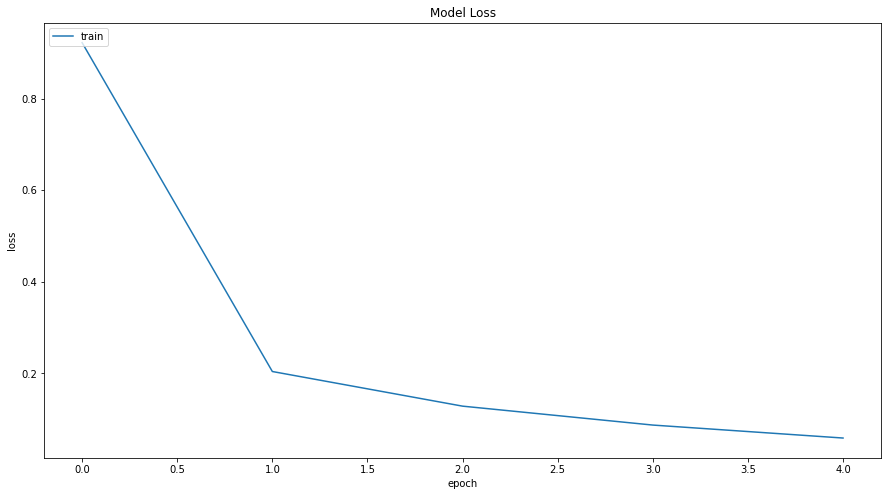

In [ ]:
plt.figure(figsize=(15,8))
learner.plot(plot_type='loss')

# How to Use Our Trained BERT Model

In [ ]:
predictor = ktrain.get_predictor(model=learner.model, preproc=preproc)

In [ ]:
predictor.get_classes()

['anger', 'fear', 'joy', 'love', 'sadness', 'surprise']

In [ ]:
predictor.predict(X_test[4])

'joy'

In [ ]:
print(X_test[4])

i can t even stand this feeling because i realize that everything is for nothing i will never be with you and i will never see you in my life it hurts but i keep supporting you


In [ ]:
print(y_test[4])

joy


In [ ]:
predictor.predict(' The charming sunshine, the golden sunset, the twinkling stars all make us joyful. He leads a simple and joyful life. The use of robotics in education can make learning more joyful.')

'joy'

In [ ]:
predictor.predict('It’s surprising to know how many people applied for the job.')

'joy'

In [ ]:
predictor.predict("Life is boring")

'sadness'

In [ ]:
predictor.predict('life is boring and aimless')

'sadness'

## Here, I am saving the Predictor object to disk and reload it at a later time to make predictions on new data. :)

In [ ]:
predictor.save('/predictor/my_predictor')

In [ ]:
reloaded_predictor = ktrain.load_predictor('/predictor/my_predictor')

In [ ]:
reloaded_predictor.predict('hey you, donot talk to me you are a lier, I hate you.')

'anger'